# Self-Organizing Maps

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

## Training the SOM

1. **x & y**: Define the grid size of the Self-Organizing Map (SOM).
2. **input_len**: Number of features in the dataset.
3. **learning_rate**: Specifies the learning rate.
4. **sigma**: Radius of the neighborhood; controls the area of influence around the winning node.
5. **Sigma effect**: A high sigma impacts a large area around the winning node, while a low sigma affects only a small area.

In [4]:
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5, random_seed=0)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

## Visualizing the results

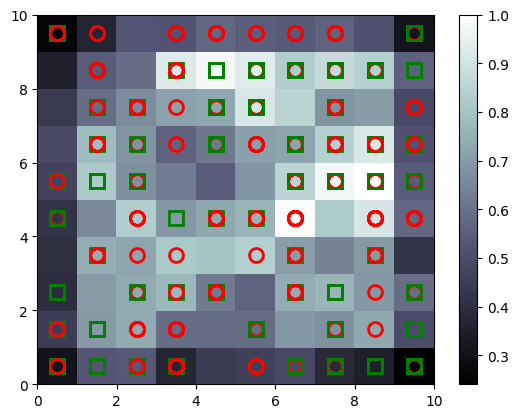

In [5]:
from pylab import (
    bone,
    pcolor,
    colorbar,
    plot,
    show,
)  # Import plotting functions from pylab

# Set up a grey background for the plot to enhance visibility
bone()

# Plot the distance map of the SOM to visualize node distances
# som.distance_map().T returns a grid showing distances between nodes in the SOM
pcolor(som.distance_map().T)

# Add a color bar to the plot to show the scale of distances in the distance map
colorbar()

# Define markers and colors for different categories
# 'o' for circles and 's' for squares
# 'r' for red (no approval) and 'g' for green (approval)
markers = ["o", "s"]
colors = ["r", "g"]

# Loop through each data point in the dataset X
for i, x in enumerate(X):
    # Find the winning node for the data point x (the closest matching node in the SOM)
    w = som.winner(x)

    # Plot a marker at the winning node position with specified settings
    plot(
        w[0] + 0.5,  # X-coordinate of winning node + offset to center the marker
        w[1] + 0.5,  # Y-coordinate of winning node + offset to center the marker
        markers[
            y[i]
        ],  # Choose the marker shape based on the category (approval or not)
        markeredgecolor=colors[y[i]],  # Choose the edge color based on the category
        markerfacecolor="None",  # Make the marker face transparent for visibility of the map
        markersize=10,  # Set the size of the marker
        markeredgewidth=2,  # Set the edge width of the marker for better visibility
    )

# Display the plot with all markers and color bar
show()

## Finding the frauds

In [6]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6, 4)], mappings[(8, 6)]), axis=0)
frauds = sc.inverse_transform(frauds)